# Data: Iris Data

In [203]:
from sklearn.datasets import load_iris  #load_wine, load_boston, fetch_california_housing

iris = load_iris()

In [206]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.DataFrame(iris.target, columns=["target"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [207]:
df.target.unique()

array([0, 1, 2])

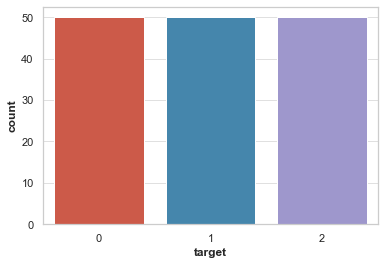

In [208]:
sns.countplot(x='target', data=df);

In [210]:
df.groupby('target').describe().T

target                        0       1       2
sepal length (cm) count  50.000  50.000  50.000
                  mean    5.006   5.936   6.588
                  std     0.352   0.516   0.636
                  min     4.300   4.900   4.900
                  25%     4.800   5.600   6.225
                  50%     5.000   5.900   6.500
                  75%     5.200   6.300   6.900
                  max     5.800   7.000   7.900
sepal width (cm)  count  50.000  50.000  50.000
                  mean    3.428   2.770   2.974
                  std     0.379   0.314   0.322
                  min     2.300   2.000   2.200
                  25%     3.200   2.525   2.800
                  50%     3.400   2.800   3.000
                  75%     3.675   3.000   3.175
                  max     4.400   3.400   3.800
petal length (cm) count  50.000  50.000  50.000
                  mean    1.462   4.260   5.552
                  std     0.174   0.470   0.552
                  min     1.000   3.000   4.500
                  25%     1.400   4.000   5.100
                  50%     1.500   4.350   5.550
                  75%     1.575   4.600   5.875
                  max     1.900   5.100   6.900
petal width (cm)  count  50.000  50.000  50.000
                  mean    0.246   1.326   2.026
                  std     0.105   0.198   0.275
                  min     0.100   1.000   1.400
                  25%     0.200   1.200   1.800
                  50%     0.200   1.300   2.000
                  75%     0.300   1.500   2.300
                  max     0.600   1.800   2.500

## Logistic Regression
- 위의 Standard Regression이 SSR을 쓰는 반면, 여기선 Maximum likelihood를 씀
- 상황에 따라 Class가 불균형하다면 Over-sampling 등의 방법을 사용

In [217]:
X = df.loc[:, df.columns != 'target']
y = df.loc[:, df.columns == 'target']

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [221]:
# #Recursive Feature Elimination
# from sklearn.feature_selection import RFE
# logreg = LogisticRegression()
# rfe = RFE(logreg, 20)
# rfe = rfe.fit(X_train, y_train)
# print(rfe.support_)
# print(rfe.ranking_)

In [222]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [223]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [229]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[16  0  0]
 [ 0 13  5]
 [ 0  0 11]]


In [230]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.72      0.84        18
           2       0.69      1.00      0.81        11

    accuracy                           0.89        45
   macro avg       0.90      0.91      0.88        45
weighted avg       0.92      0.89      0.89        45



In [232]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

ValueError: multiclass format is not supported